# Analysis of loop structure to support "boot up" theory

**Goal:** The structure of UMAP embeddings reveals repeating neural encording of song. This involves loops through UMAP space. While the distance in UMAP space may not be directly interpretable, we can quantify the loop number and exit angle for each repeated syllable


## File Loading/Setup


In [ ]:
pip install numpy matplotlib hdbscan scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039164 sha256=80efc444041a4634b935ce1599f342ee60cc079cf3cb0c5a083a429c72619135
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan


In [ ]:
# Libaries
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import scipy

In [ ]:
# Mount Drive to access files on google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load a file
data = np.load('/content/drive/MyDrive/UO_BIRD/LargeEmbedding.npz')

emb = data['embVals']

# Clustering

In [ ]:
def makeClusters(data,min_cluster_size = 20):
	clusterer = hdbscan.HDBSCAN(metric='euclidean',min_cluster_size=min_cluster_size)
	clusterer.fit(data)
	return clusterer.labels_

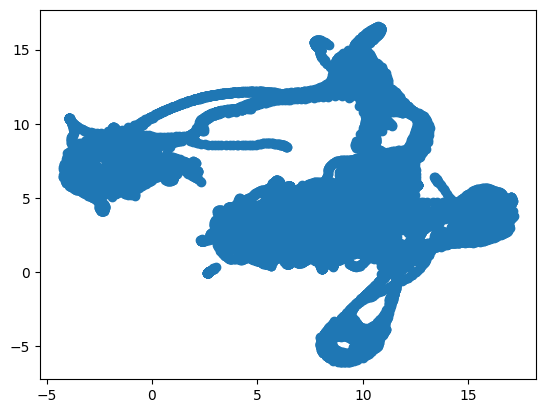

In [ ]:
# This is our embedding in 2d
plt.scatter(emb[:,0],emb[:,1])
plt.show()

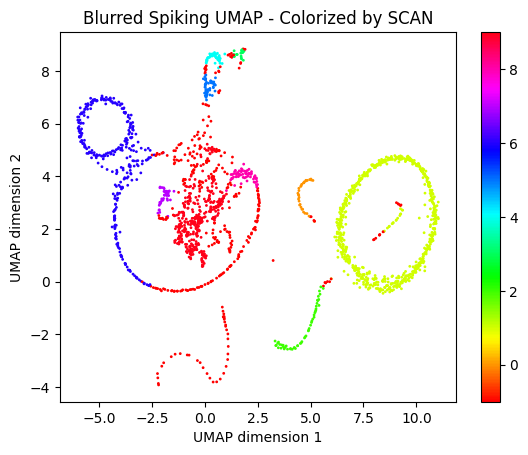

In [ ]:
# 2d Clustering

clusters2d = makeClusters(emb)
plt.scatter(emb[:,0],emb[:,1],s = 1,c = clusters2d,cmap='hsv')
plt.title('Blurred Spiking UMAP - Colorized by SCAN')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.colorbar()
plt.show()

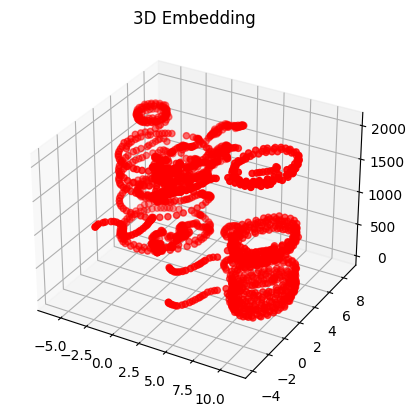

In [ ]:
# 3D with time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter points
ax.scatter(emb[:,0],emb[:,1], np.arange(len(emb[:,0])), c='r', marker='o')

# Set labels and title
ax.set_title('3D Embedding')

# Display the plot
plt.show()

(2047, 2)


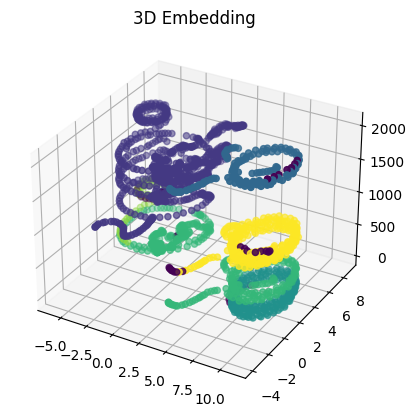

In [ ]:
# 3d Clusters
print(emb.shape)
relN = len(emb[:,0])
newAdd = np.arange(relN).reshape(relN,1)
modEmb = np.hstack((emb,newAdd))

clusters3d = makeClusters(modEmb)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter points
ax.scatter(emb[:,0],emb[:,1], np.arange(len(emb[:,0])), c=clusters3d, marker='o')

# Set labels and title
ax.set_title('3D Embedding')

# Display the plot
plt.show()

## Intensity Sorting


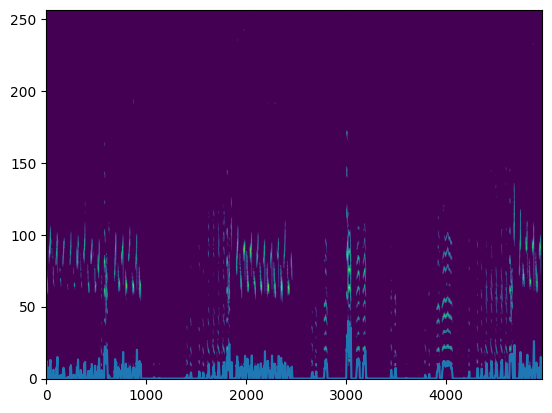

In [ ]:
plt.imshow(vocalArr,aspect = 'auto', origin = 'lower')
plt.plot(vocalArr.sum(axis = 0)/10)

plt.show()

In [ ]:
intensityArr = vocalArr.sum(axis = 0)
timeArr = embStartEnd[1,-1]*np.arange(len(intensityArr))/len(intensityArr)

smoothedIntensity = scipy.ndimage.gaussian_filter1d(intensityArr, 30)

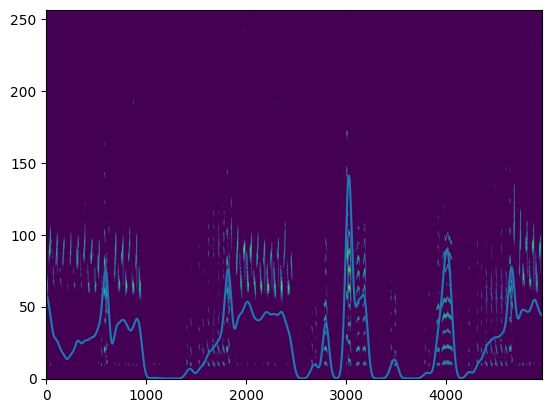

In [ ]:
plt.imshow(vocalArr,aspect = 'auto', origin = 'lower')
plt.plot(smoothedIntensity)

plt.show()

In [ ]:
badTime = timeArr[smoothedIntensity < 5]


goodEmbIndices = []

for i in range(0,embStartEnd.shape[1]):
  start = embStartEnd[0,i]
  end = embStartEnd[1,i]

  #if contains bad dont use
  checkContain = np.where(np.logical_and(badTime < end, badTime > start))[0]
  if len(checkContain) == 0:
    goodEmbIndices.append(i)

goodEmbIndices = np.array(goodEmbIndices)

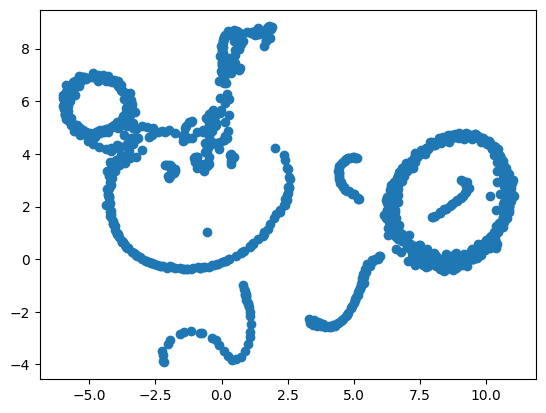

In [ ]:
# This is our embedding
plt.scatter(emb[goodEmbIndices,0],emb[goodEmbIndices,1])
plt.show()

<ipython-input-15-365e9e7db237>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(inputData[:,0],inputData[:,1],s = 1,cmap='hsv')


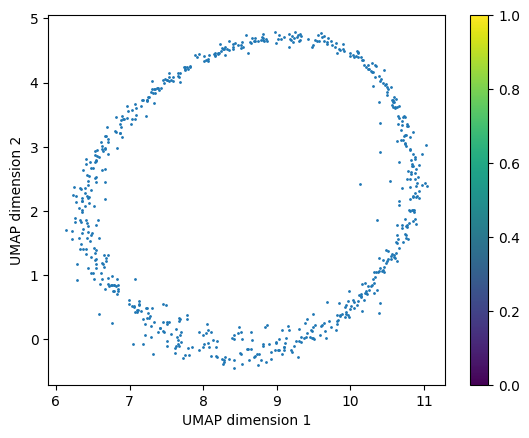

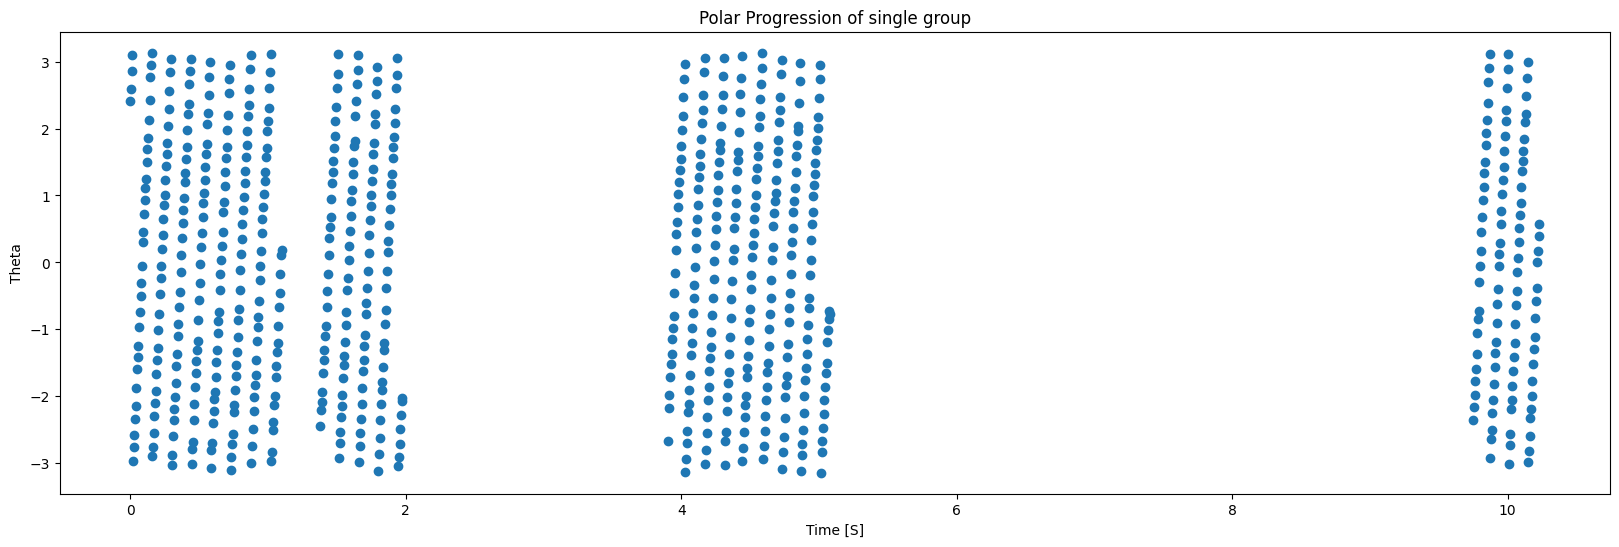

In [ ]:
def makeClusters(data):
	clusterer = hdbscan.HDBSCAN(metric='euclidean',min_cluster_size=10)
	clusterer.fit(data)
	return clusterer.labels_,clusterer.probabilities_

def cartesian_to_polar(points):
    # Calculate the center of the points
    center_x, center_y = np.mean(points, axis=0)

    # Translate points to have the center at the origin
    translated_points = points - np.array([center_x, center_y])

    # Convert to polar coordinates
    r = np.sqrt(translated_points[:, 0]**2 + translated_points[:, 1]**2)
    theta = np.arctan2(translated_points[:, 1], translated_points[:, 0])

    return r, theta

def plotLoops(inputData):

  plt.scatter(inputData[:,0],inputData[:,1],s = 1,cmap='hsv')
  plt.xlabel('UMAP dimension 1')
  plt.ylabel('UMAP dimension 2')
  plt.colorbar()
  plt.show()


def countLoops(inputData,inputTime,plot = True):
  r, theta = cartesian_to_polar(inputData)
  fig = plt.figure(figsize=(20, 6))

  if plot:
    plt.scatter(inputTime,theta)
    plt.title('Polar Progression of single group')
    plt.ylabel('Theta')
    plt.xlabel('Time [S]')
    plt.show()



clusters,probs = makeClusters(emb[:,:])

goodInd = np.where(clusters == 3)[0] # 3 good
inputData = emb[goodInd,:]
inputStarts = embStartEnd[0,goodInd]
plotLoops(inputData)
countLoops(inputData,inputStarts)

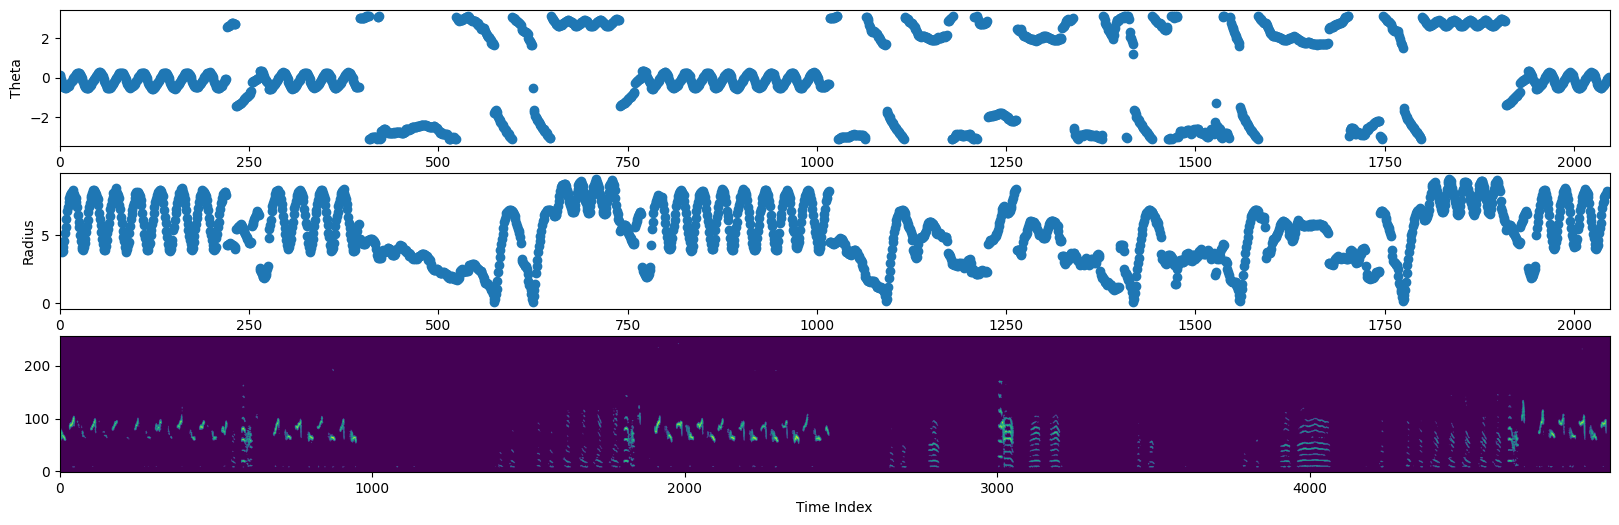

In [ ]:
r, theta = cartesian_to_polar(emb)
fig = plt.figure(figsize=(20, 6))

plt.subplot(3,1,1)
plt.scatter(np.arange(len(theta)),theta)
plt.xlim(0,len(theta))
plt.ylabel('Theta')
plt.subplot(3,1,2)
plt.scatter(np.arange(len(theta)),r)
plt.xlim(0,len(theta))
plt.ylabel('Radius')
plt.subplot(3,1,3)
plt.imshow(vocalArr,aspect = 'auto',origin = 'lower')
plt.xlabel('Time Index')

plt.show()

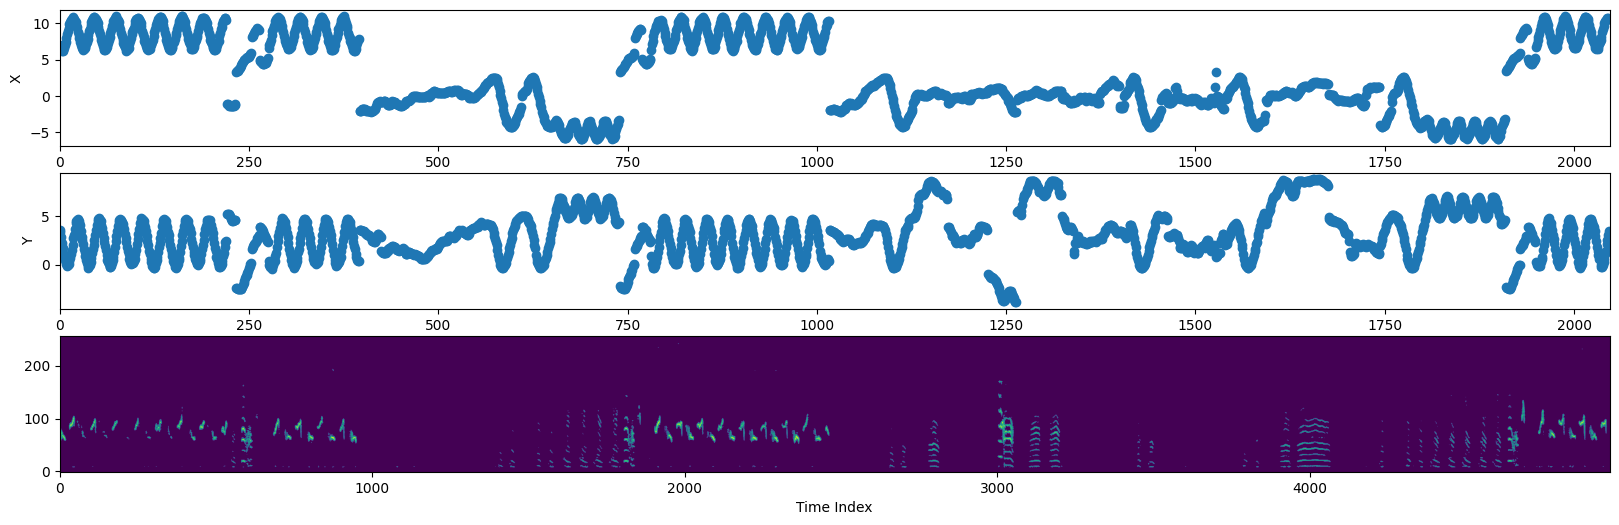

In [ ]:

fig = plt.figure(figsize=(20, 6))
plt.subplot(3,1,1)
plt.scatter(np.arange(len(emb[:,0])),emb[:,0])
plt.xlim(0,len(emb[:,0]))
plt.ylabel('X')
plt.subplot(3,1,2)
plt.scatter(np.arange(len(emb[:,0])),emb[:,1])
plt.xlim(0,len(emb[:,0]))
plt.ylabel('Y')
plt.subplot(3,1,3)
plt.imshow(vocalArr,aspect = 'auto',origin = 'lower')
plt.xlabel('Time Index')

plt.show()

## Analysis of X-Y Data



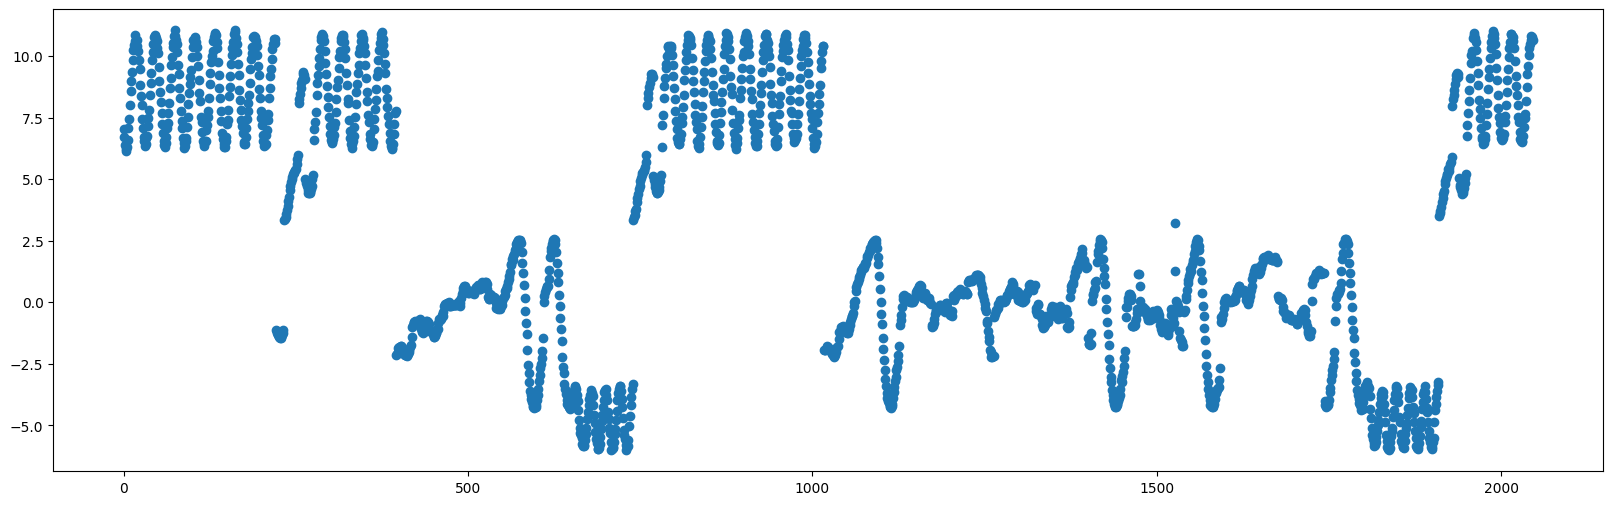

In [ ]:
# X data
fig = plt.figure(figsize=(20, 6))
plt.scatter(np.arange(len(emb[:,0])),emb[:,0])
plt.show()

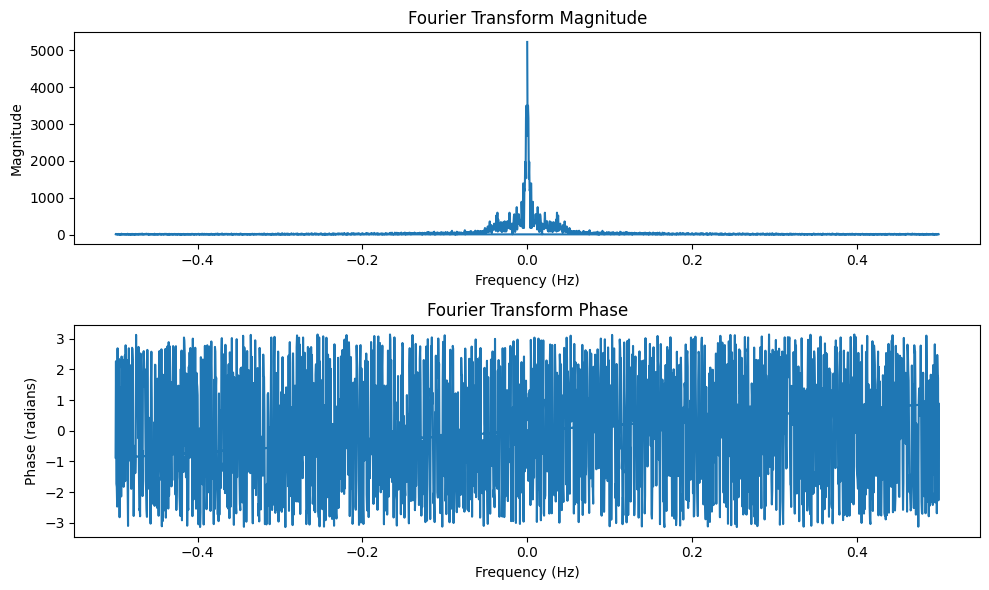

In [ ]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Load your time series data
#time_series_data = np.array([ ... ])  # Replace with your actual data
time_series_data = emb[:,0]

# Perform the Fourier transform
fft_result = fft(time_series_data)

# Compute the corresponding frequencies
sampling_rate = 1  # Replace with your actual sampling rate
freq_bins = fftfreq(len(time_series_data), d=1/sampling_rate)

# Plot the magnitude and phase of the Fourier coefficients
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(freq_bins, np.abs(fft_result))
plt.title('Fourier Transform Magnitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.plot(freq_bins, np.angle(fft_result))
plt.title('Fourier Transform Phase')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()


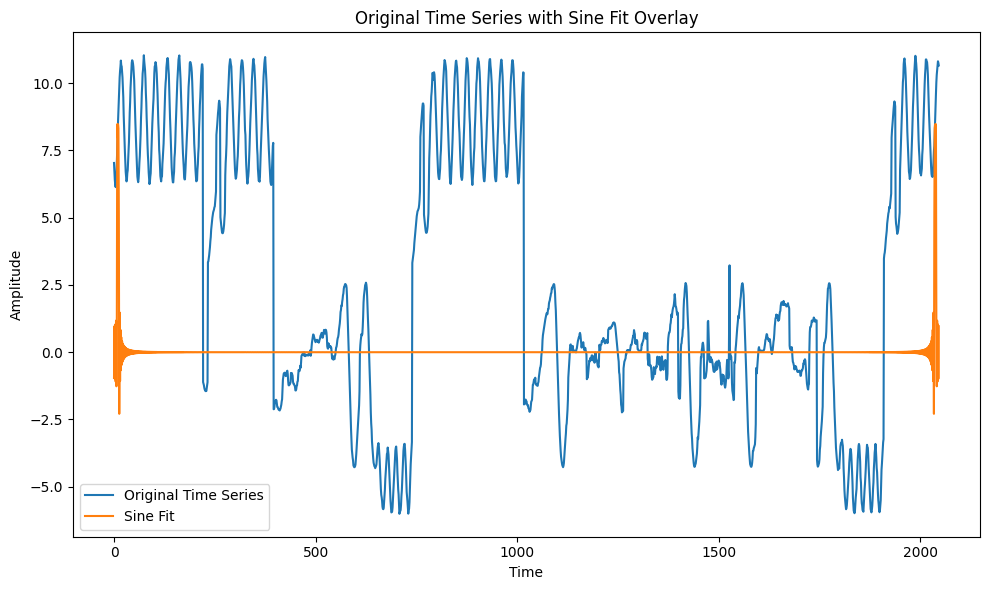

In [ ]:
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the sum of sine waves function
def sum_of_sines(t, *params):
    num_sines = len(params) // 3
    result = np.zeros_like(t)
    for i in range(num_sines):
        amplitude, frequency, phase = params[i*3], params[i*3+1], params[i*3+2]
        result += amplitude * np.sin(2 * np.pi * frequency * t + phase)
    return result

# Load your time series data
time_series_data = emb[:,0] # Replace with your actual data

# Perform the Fourier transform
fft_result = fft(time_series_data)

# Compute the corresponding frequencies
sampling_rate = 1  # Replace with your actual sampling rate
freq_bins = fftfreq(len(time_series_data), d=1/sampling_rate)

# Define initial parameter guesses for fitting
num_sines = 3  # Number of sine waves to fit
initial_params = [1.0, 10, 0.0] * num_sines  # Initial guesses for amplitude, frequency, and phase

# Fit the sum of sine waves function to the Fourier coefficients
params, _ = curve_fit(sum_of_sines, freq_bins, fft_result.real, p0=initial_params)

# Generate the fitted function using the optimized parameters
fitted_data = sum_of_sines(freq_bins, *params)

# Inverse Fourier transform to obtain the time domain signal of the fitted function
fitted_time_domain = np.fft.ifft(fitted_data)

# Plot the original time series data and the fitted sine wave overlay
plt.figure(figsize=(10, 6))

plt.plot(np.arange(len(time_series_data)), time_series_data, label='Original Time Series')
plt.plot(np.arange(len(fitted_time_domain)), fitted_time_domain.real, label='Sine Fit')#, linestyle='dashed')

plt.legend()
plt.title('Original Time Series with Sine Fit Overlay')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


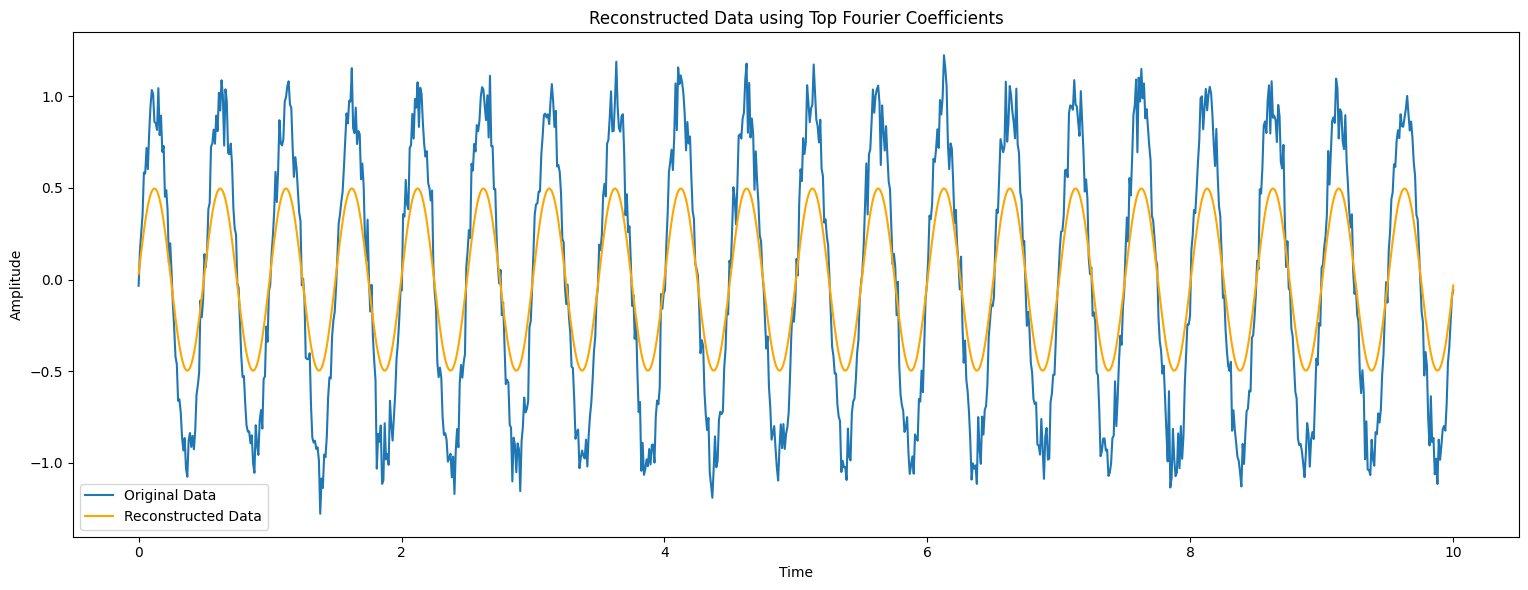

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example time series
time_series = np.linspace(0, 10, 1000)

# Example data series
data_series = np.sin(2 * np.pi * 2 * time_series) + np.random.normal(0, 0.1, len(time_series))

# Compute the FFT of the data
fft_values = np.fft.fft(data_series)

# Calculate the magnitudes of the Fourier coefficients
fft_magnitudes = np.abs(fft_values)

# Find the indices of the top few coefficients (e.g., top 10)
num_top_coefficients = 1
top_indices = np.argsort(fft_magnitudes)[-num_top_coefficients:]

# Keep only the top Fourier coefficients
fft_values_filtered = np.zeros_like(fft_values)
fft_values_filtered[top_indices] = fft_values[top_indices]

# Reconstruct data using the top Fourier coefficients
reconstructed_data = np.fft.ifft(fft_values_filtered)
reconstructed_data_r = np.real(reconstructed_data)  # Keep only the real part
reconstructed_data_i = np.imag(reconstructed_data)  # Keep only the real part

# Plot the original data and reconstructed data
plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
plt.plot(time_series, data_series, label='Original Data')
plt.title("Original Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.plot(time_series, reconstructed_data_r, label='Reconstructed Data', color='orange')
#plt.plot(time_series, reconstructed_data_i)
plt.title("Reconstructed Data using Top Fourier Coefficients")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


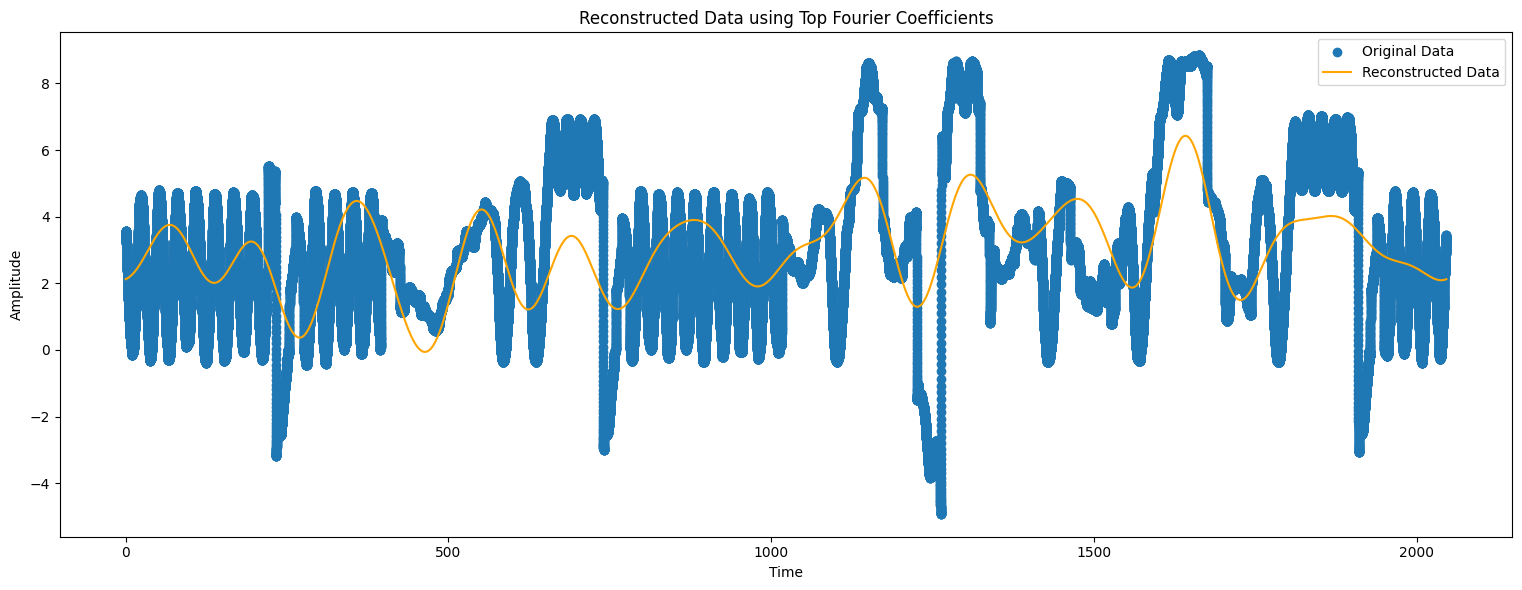

<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# data_series = emb[:,1]
# time_series = np.arange(len(data_series))
data_series = emb[:, 1]  # Assuming emb is already defined
time_series = np.arange(len(data_series))

# Interpolate the data by a factor of 10
interpolation_factor = 50
new_time_series = np.linspace(time_series.min(), time_series.max(), len(time_series) * interpolation_factor)
f = interp1d(time_series, data_series, kind='cubic')
data_series = f(new_time_series)
time_series = new_time_series


# Compute the FFT of the data
fft_values = np.fft.fft(data_series)

# Calculate the magnitudes of the Fourier coefficients
fft_magnitudes = np.abs(fft_values)

# Find the indices of the top few coefficients (e.g., top 10)
num_top_coefficients = 10
top_indices = np.argsort(fft_magnitudes)[-num_top_coefficients:]

# Keep only the top Fourier coefficients
fft_values_filtered = np.zeros_like(fft_values)
fft_values_filtered[top_indices] = fft_values[top_indices]

# Reconstruct data using the top Fourier coefficients
reconstructed_data = np.fft.ifft(fft_values_filtered)
reconstructed_data_r = np.real(reconstructed_data)  # Keep only the real part
reconstructed_data_i = np.imag(reconstructed_data)  # Keep only the real part

# Plot the original data and reconstructed data
plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
plt.scatter(time_series, data_series, label='Original Data')
plt.title("Original Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.plot(time_series, reconstructed_data_r, label='Reconstructed Data', color='orange')
#plt.plot(time_series, reconstructed_data_i)
plt.title("Reconstructed Data using Top Fourier Coefficients")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()
plt.figure(figsize=(30, 6))


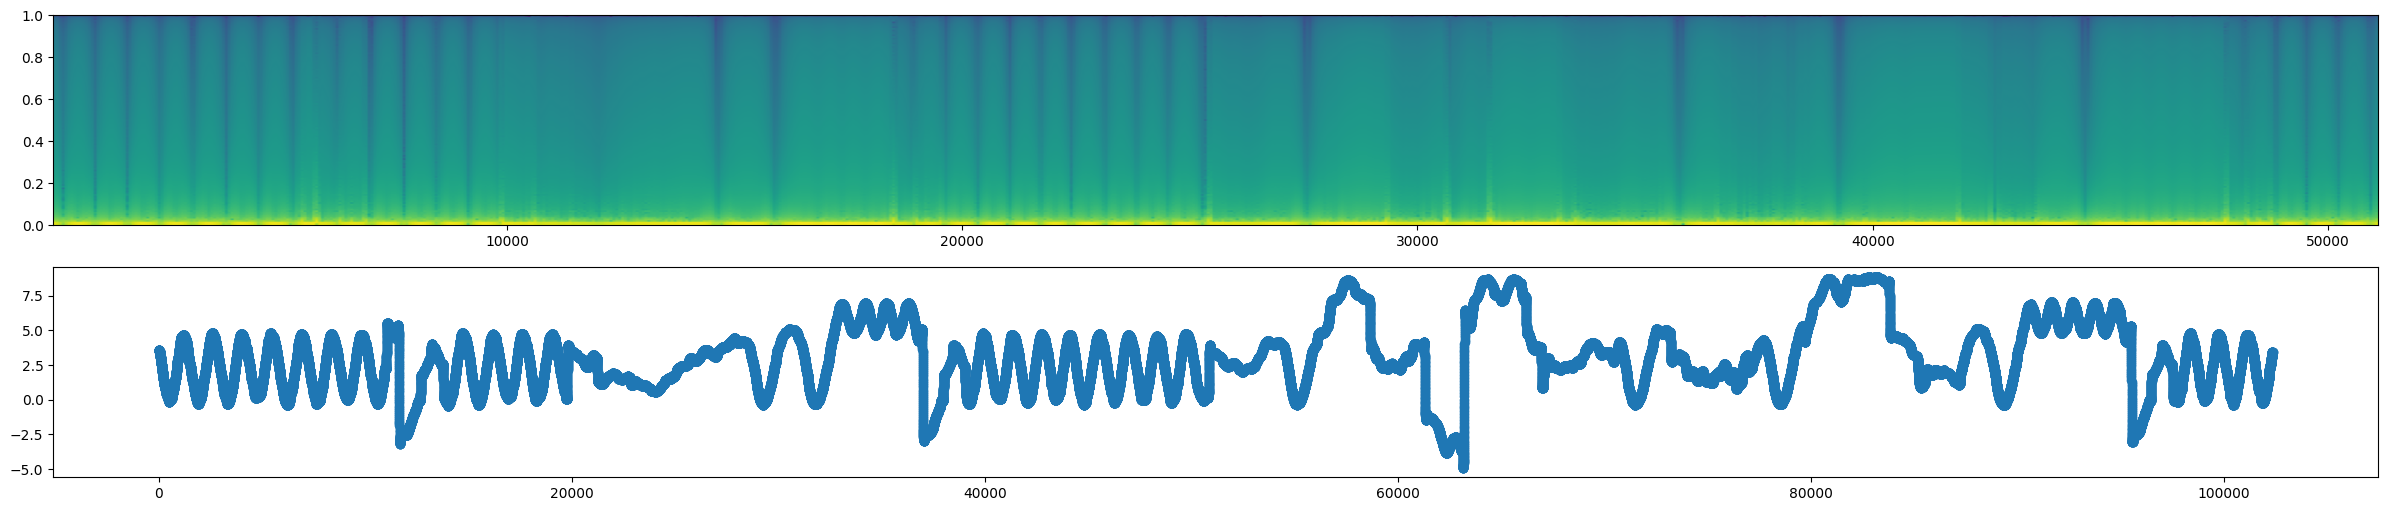

In [ ]:
plt.figure(figsize=(30, 6))

plt.subplot(2,1,1)
plt.specgram(data_series )
plt.subplot(2,1,2)
plt.scatter(np.arange(len(data_series)),data_series)

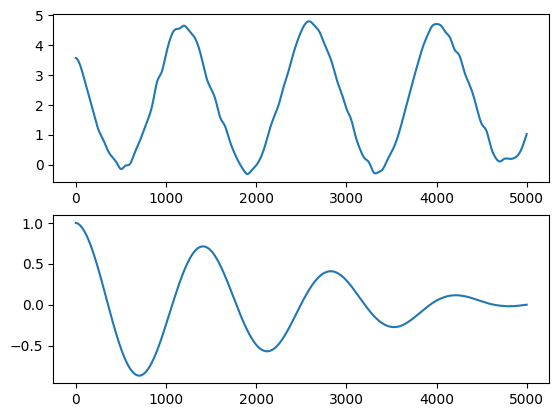

In [ ]:
from statsmodels import api as sm

subData = data_series[0:5000]


plt.subplot(2,1,1)
plt.plot(subData)

plt.subplot(2,1,2)
acf = sm.tsa.acf(subData, nlags=len(subData))
plt.plot(np.arange(len(subData)), acf)
plt.show()

# Fourier Series Stuff

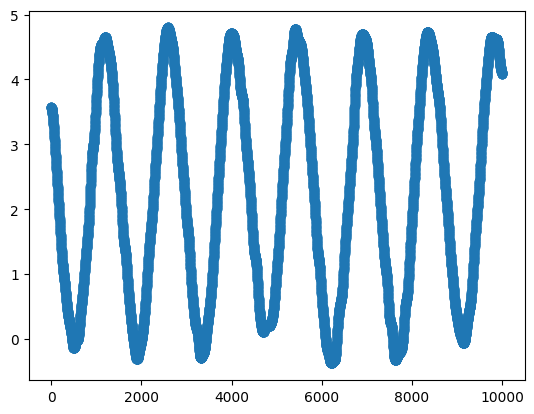

In [ ]:
subsetData = data_series[0:10000]

plt.scatter(np.arange(len(subsetData)),subsetData)


10000
1000


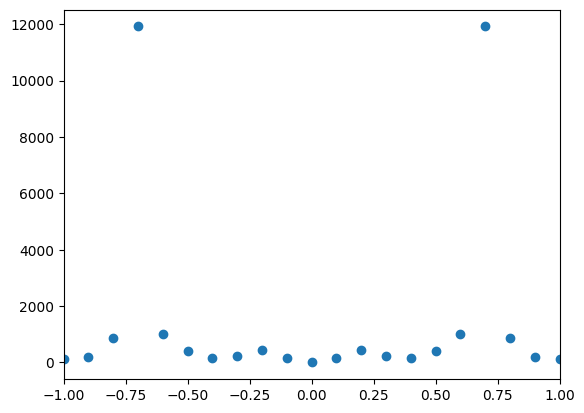

In [ ]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
subsetData = subsetData - np.mean(subsetData)
N = len(subsetData)
print(N)
timeMain = 10
sampleRate = int(N/timeMain)
yf = fft(subsetData)
print(sampleRate)
xf = fftfreq(N, 1/sampleRate)

plt.scatter(xf, np.abs(yf))
plt.xlim([-1,1])
plt.show()

In [ ]:
def fourierReconstruct(inputData):
  # Compute the FFT of the data
  fft_values = np.fft.fft(inputData)

  # Calculate the magnitudes of the Fourier coefficients
  fft_magnitudes = np.abs(fft_values)

  # Find the indices of the top few coefficients (e.g., top 10)
  num_top_coefficients = 4
  top_indices = np.argsort(fft_magnitudes)[-num_top_coefficients:]

  # Keep only the top Fourier coefficients
  fft_values_filtered = np.zeros_like(fft_values)
  fft_values_filtered[top_indices] = fft_values[top_indices]

  # Reconstruct data using the top Fourier coefficients
  reconstructed_data = np.fft.ifft(fft_values_filtered)
  reconstructed_data_r = np.real(reconstructed_data)  # Keep only the real part

  return reconstructed_data_r, fft_values

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


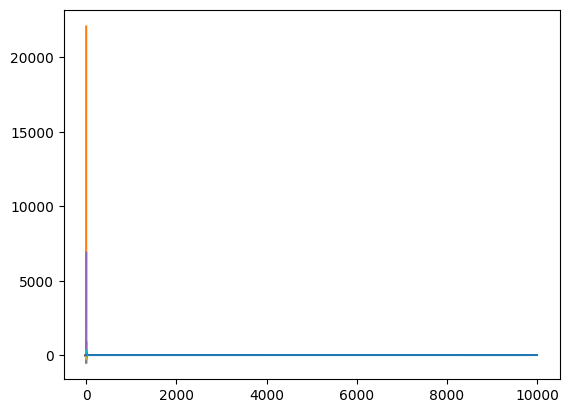

In [ ]:
subsetData = data_series[0:10000]

plt.plot(subsetData)
plt.plot(fourierReconstruct(subsetData))
plt.show()

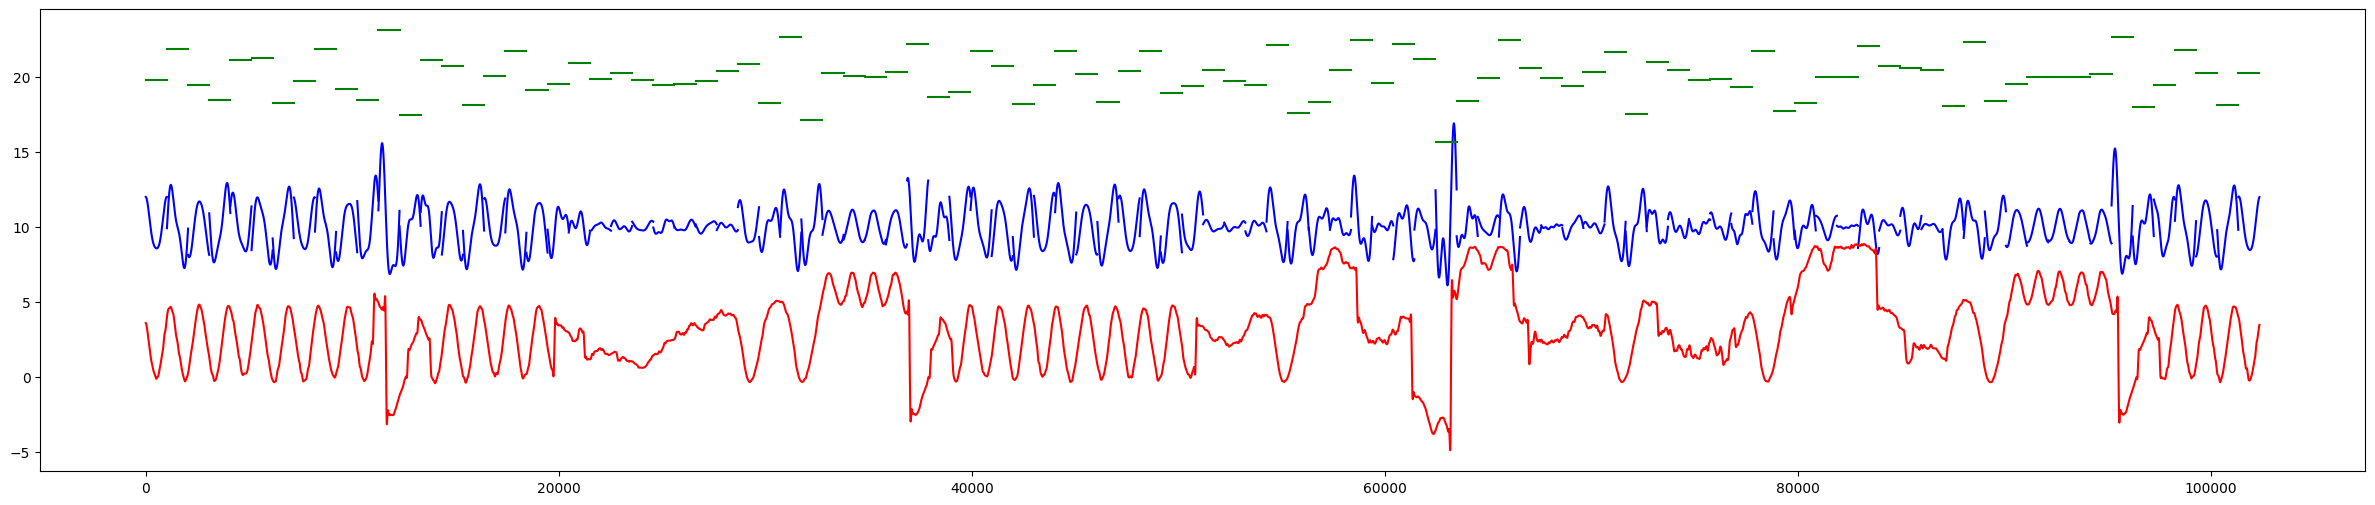

In [ ]:
# Fourier series segments

totalN = len(data_series)
entireIndices = np.arange(totalN)
numSplits = 100
splitIndices = np.array_split(entireIndices, numSplits)



plt.figure(figsize=(30, 6))

for subArr in splitIndices:

  usedData = data_series[subArr]
  usedData = usedData - np.mean(usedData)
  reconstructed, vals = fourierReconstruct(usedData)
  plt.plot(subArr,reconstructed + 10,c = 'b')

  valArr = np.zeros_like(reconstructed) + np.median(vals)
  plt.plot(subArr,valArr + 20,c = 'g')


plt.plot(entireIndices,data_series,c = 'r')

plt.show()

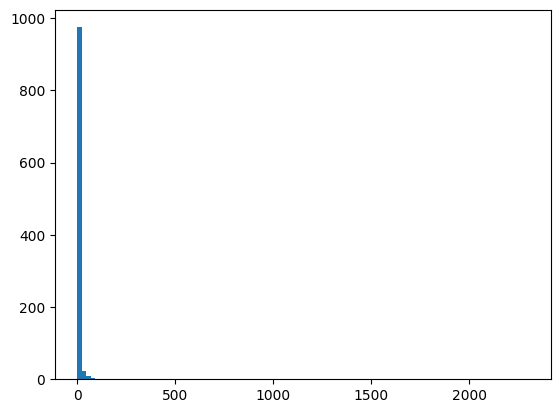

In [ ]:
count = 15

relData = data_series[splitIndices[count]]


yf = fft(relData)
xf = fftfreq(len(relData), 1/100)
absVal = np.abs(yf)

plt.hist(absVal, bins = 100)
# plt.scatter(xf, np.abs(yf))
# plt.xlim([-1,1])
plt.show()

# Sin Fit

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Chat GPT
def fit_data_with_sine(x_data, y_data, initial_guess=None):
    def sine_func(x, A, omega, phi, offset):
        return A * np.sin(omega * x + phi) + offset

    if initial_guess is None:
        offsetGuess = np.median(y_data)
        ampGuess = np.max(y_data) - offsetGuess # improve

        initial_guess = [1, 50, 0, offsetGuess]

    fit_params, _ = curve_fit(sine_func, x_data, y_data, p0=initial_guess, maxfev=5000)
    fitted_y_data = sine_func(x_data, *fit_params)

    # plt.scatter(x_data, y_data, label='Original Data')
    # plt.plot(x_data, fitted_y_data, label='Fitted Curve', color='orange')
    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.title('Fitting Data with a Sine Function')
    # plt.legend()
    # plt.show()

    #print("Fitted Parameters: A = {:.2f}, omega = {:.2f}, phi = {:.2f}, offset = {:.2f}".format(*fit_params))

    return fitted_y_data, fit_params

# Generate some example data
x_data = np.linspace(0, 10, 100)
true_params = [2.5, 1.5, np.pi/3, 0.5]
y_data = true_params[0] * np.sin(true_params[1] * x_data + true_params[2]) + true_params[3] + np.random.normal(0, 0.2, len(x_data))

# Fit the data using the function
fitted_data, fitted_params = fit_data_with_sine(x_data, y_data)

# You can now use 'fitted_data' and 'fitted_params' for further analysis or processing.


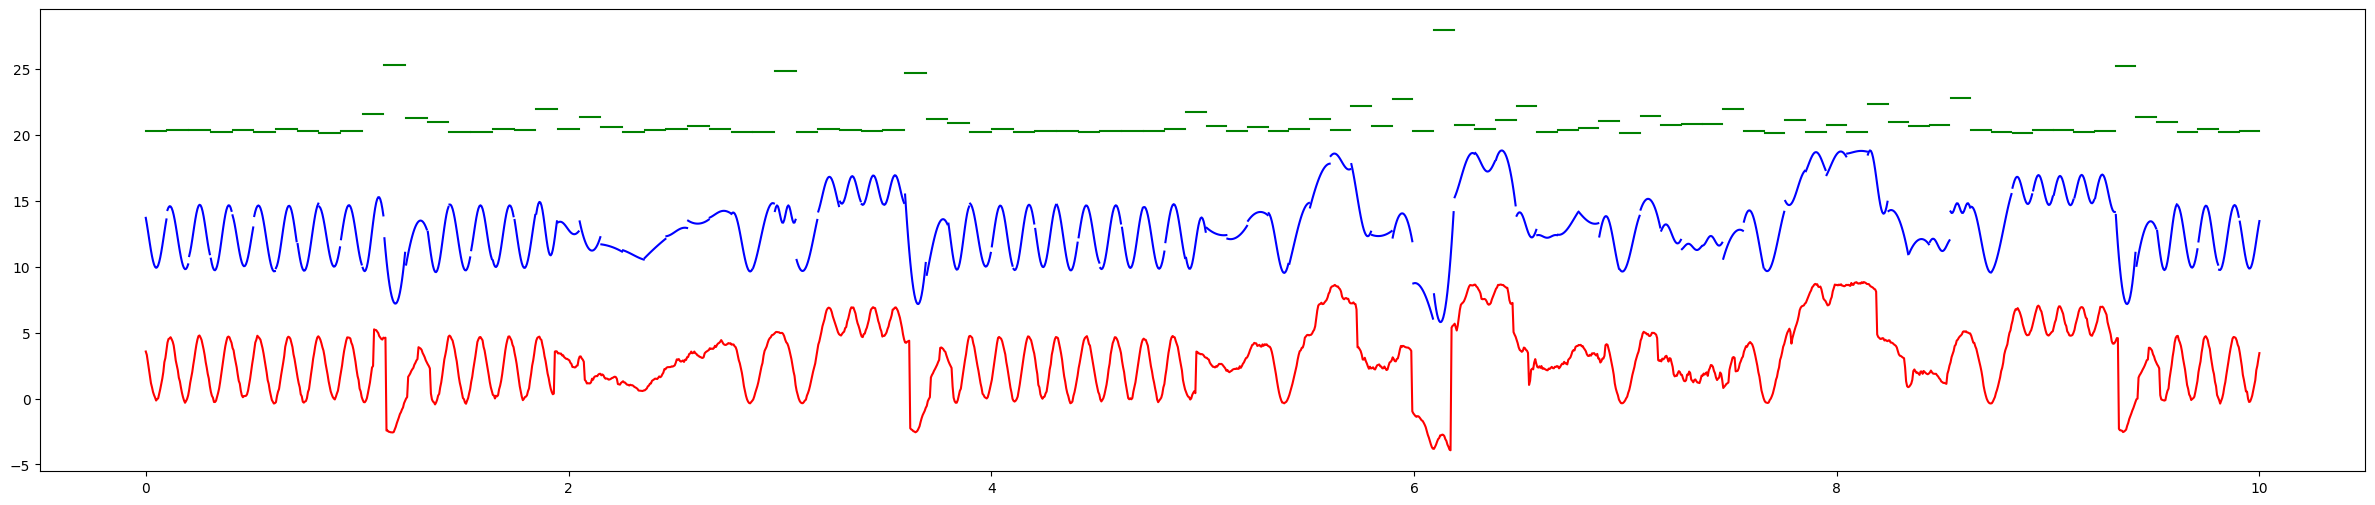

In [ ]:
# SIMPLE Sin fit

# Fourier series segments
data_series = emb[:,1]
totalN = len(data_series)
entireIndices = np.arange(totalN)
numSplits = 100
splitIndices = np.array_split(entireIndices, numSplits)
entireTime = np.linspace(0,10,totalN)


plt.figure(figsize=(30, 6))

for subArr in splitIndices:

  usedData = data_series[subArr]
  usedTime = entireTime[subArr]
  #print(usedTime.shape)
  #print(usedData.shape)
  #usedData = usedData - np.mean(usedData)
  fitted_y_data, fit_params = fit_data_with_sine(usedTime,usedData)
  plt.plot(usedTime,fitted_y_data + 10,c = 'b')

  fitTest = np.abs(usedData - fitted_y_data)
  valArr = np.zeros_like(fitted_y_data) + np.mean(fitTest)*5
  plt.plot(usedTime,valArr + 20,c = 'g')

  # valArr2 = np.zeros_like(fitted_y_data) + fit_params[3]
  # plt.plot(usedTime,valArr2 + 30,c = 'pink')

  # valArr3 = np.zeros_like(fitted_y_data) + fit_params[0]
  # plt.plot(usedTime,valArr2 + 40,c = 'k')

plt.plot(entireTime,data_series,c = 'r')
# plt.ylim([-10,100])
plt.show()

# Baseline correction

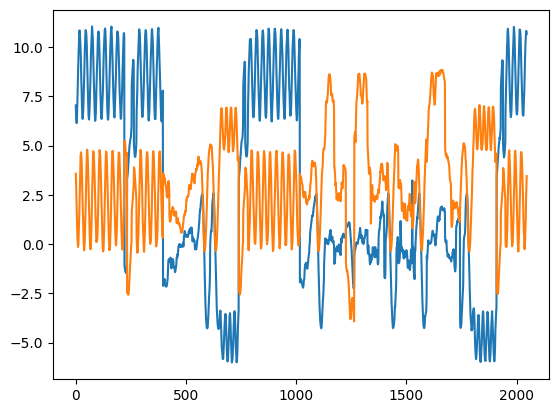

In [ ]:
rawX = emb[:,0]
rawY = emb[:,1]

plt.plot(rawX)
plt.plot(rawY)
plt.show()

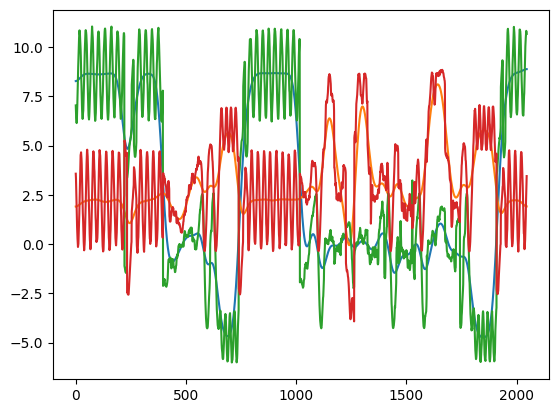

In [ ]:
# print(rawX.shape)
# A = np.convolve(rawX, np.ones(10)/10, mode='same')
# print(A.shape)
from scipy.ndimage import gaussian_filter1d

M = 20
BLX = gaussian_filter1d(rawX, M) #np.convolve(rawY, np.ones(M)/M, mode='same')#np.convolve(rawX, np.ones(M)/M, mode='same')
BLY = gaussian_filter1d(rawY, M) #np.convolve(rawY, np.ones(M)/M, mode='same')
BCX = rawX - BLX
BCY = rawY - BLY

plt.plot(BLX)
plt.plot(BLY)
plt.plot(rawX)
plt.plot(rawY)
plt.show()


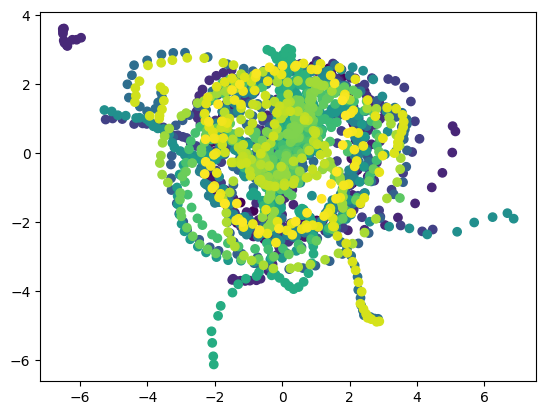

In [ ]:
plt.scatter(BCX,BCY,c = np.arange(len(BCX)))
plt.show()

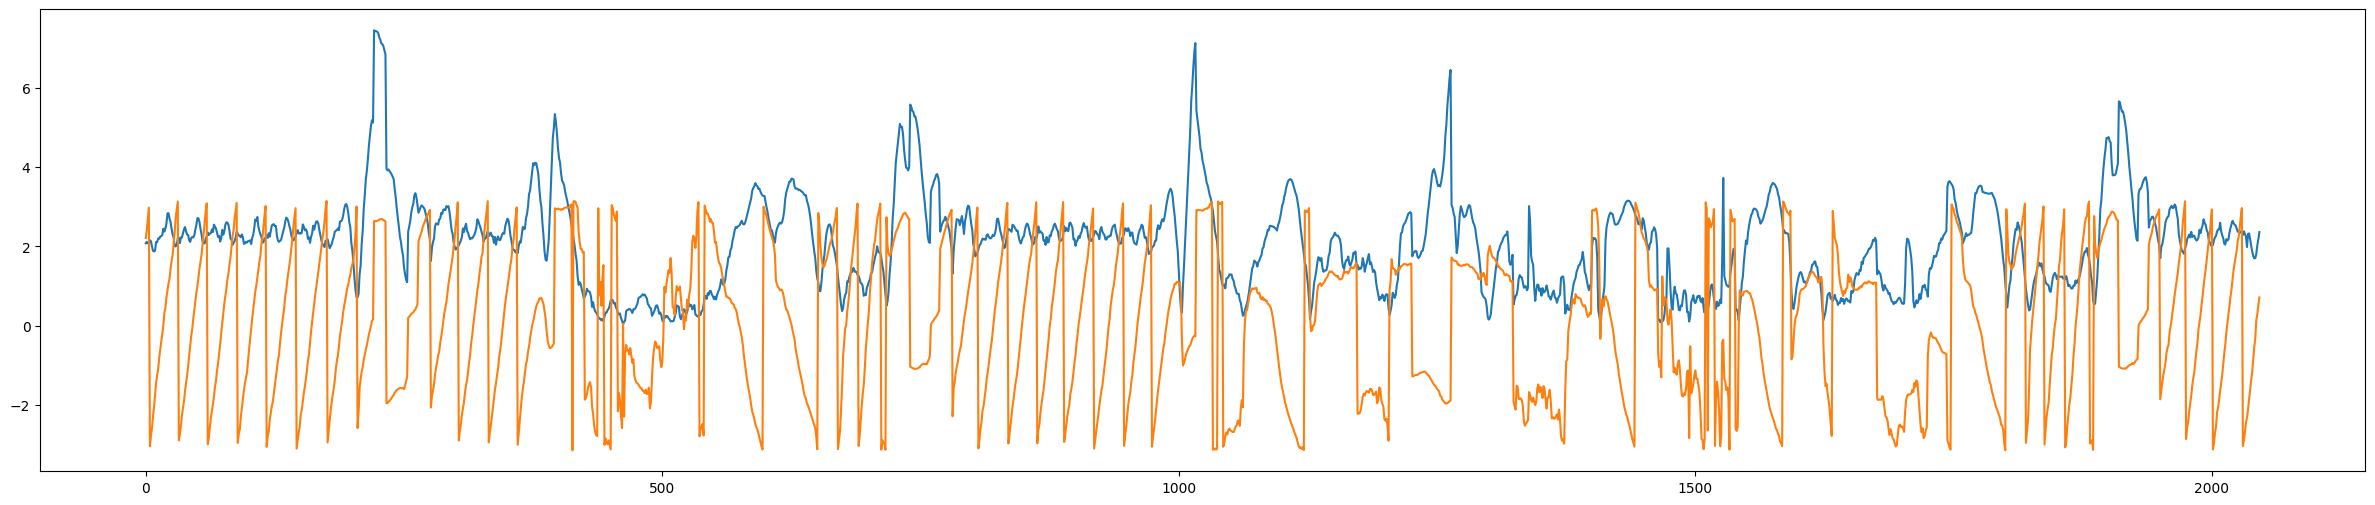

In [ ]:
newR = np.sqrt(np.square(BCX) + np.square(BCY))
newTheta = np.arctan2(BCY, BCX)

plt.figure(figsize=(30, 6))

plt.plot(newR)
plt.plot(newTheta)
plt.show()

In [ ]:
modTheta = newTheta.copy()
modTheta[0] = newTheta[0]
for i in range(1,len(newTheta)):
  angleDiff = newTheta[i] - newTheta[i-1]
  if angleDiff < -6:#-np.pi:
    print('big step')
    modTheta[i] = modTheta[i-1] + angleDiff + 2*np.pi
  else:
    modTheta[i] =  modTheta[i-1] + angleDiff

big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step
big step


In [ ]:

for i in range(1,len(newTheta)):
  angleDiff = newTheta[i] - newTheta[i-1]
  print(angleDiff)

0.20227885
0.28482246
0.2791915
-6.016181
0.25555134
0.20498824
0.29565954
0.24190617
0.30523396
0.29435003
0.19428372
0.16407716
0.2691875
0.21860683
0.20439762
0.18306401
0.2175463
0.31543955
0.12626964
0.25436014
0.19074303
0.16549051
0.12854445
0.25175393
0.18846703
0.16162801
0.27976847
0.3019302
0.36547518
0.19825315
0.19133615
-6.018338
0.15568566
0.21266508
0.25366712
0.19530892
0.17031634
0.25764906
0.20865333
0.17074645
0.25563693
0.22903013
0.29458153
0.23025027
0.18274486
0.24811965
0.214981
0.23180827
0.219944
0.15816242
0.22368354
0.2185098
0.17872036
0.17165804
0.25585866
0.27270317
0.26963615
0.29722214
0.19596672
-6.0720825
0.15708113
0.270813
0.24396873
0.15751886
0.17480755
0.20253038
0.23947644
0.1652149
0.25620985
0.17540967
0.24040091
0.22415093
0.28951678
0.2536349
0.25086668
0.23734242
0.19971389
0.18571377
0.23612046
0.1393584
0.2246015
0.18425429
0.26935863
0.26229095
0.15407276
0.29899025
0.20631266
0.18449688
-6.0483394
0.2242434
0.10856581
0.3209617
0.23011

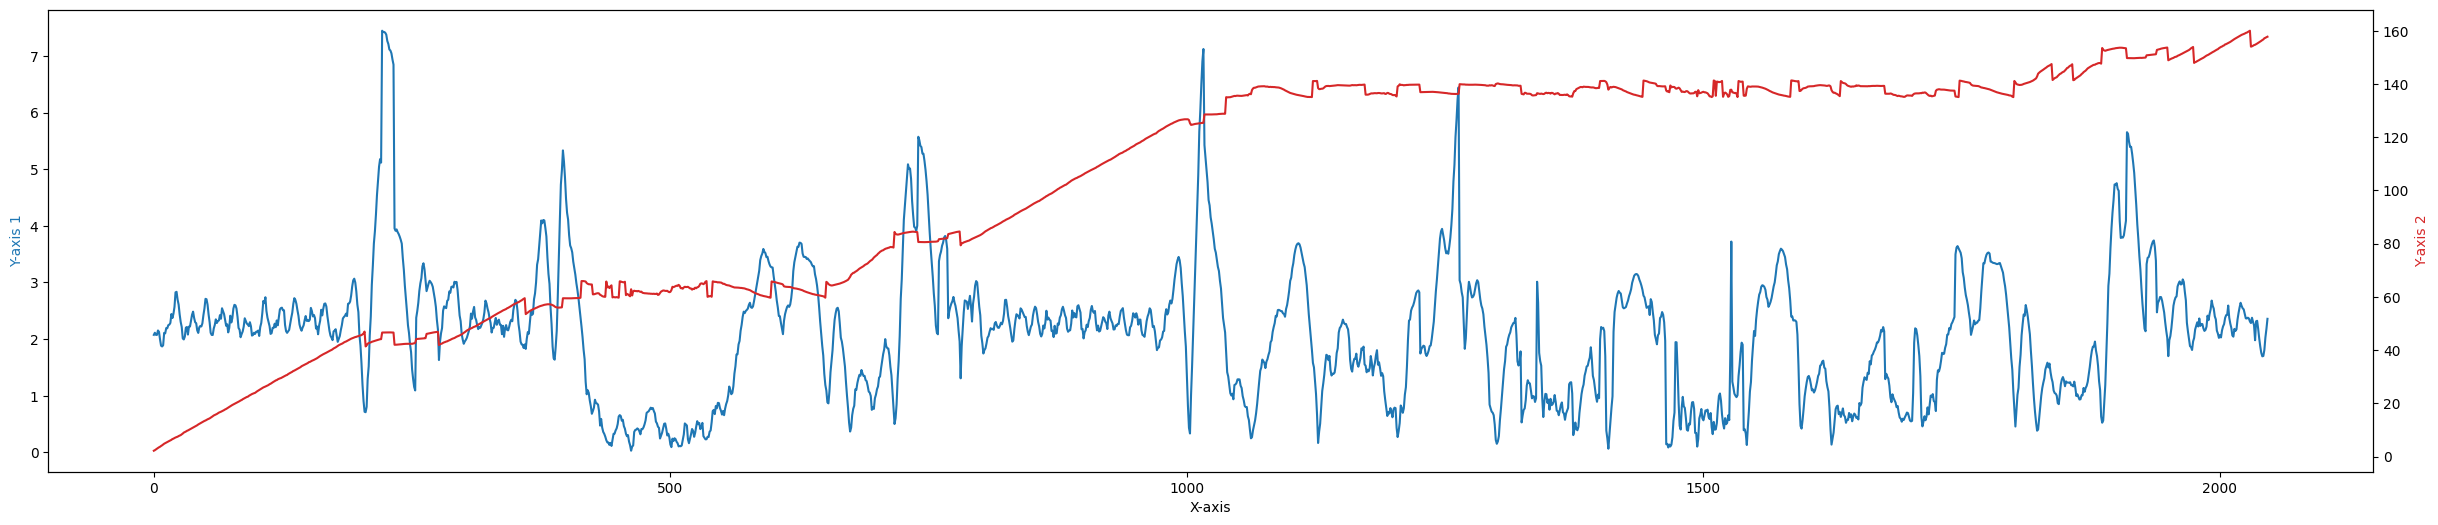

In [ ]:


fig, ax1 = plt.subplots(figsize=(30, 6))

ax1.plot(newR, color='tab:blue')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis 1', color='tab:blue')

ax2 = ax1.twinx()
ax2.plot(modTheta, color='tab:red')
ax2.set_ylabel('Y-axis 2', color='tab:red')

plt.show()


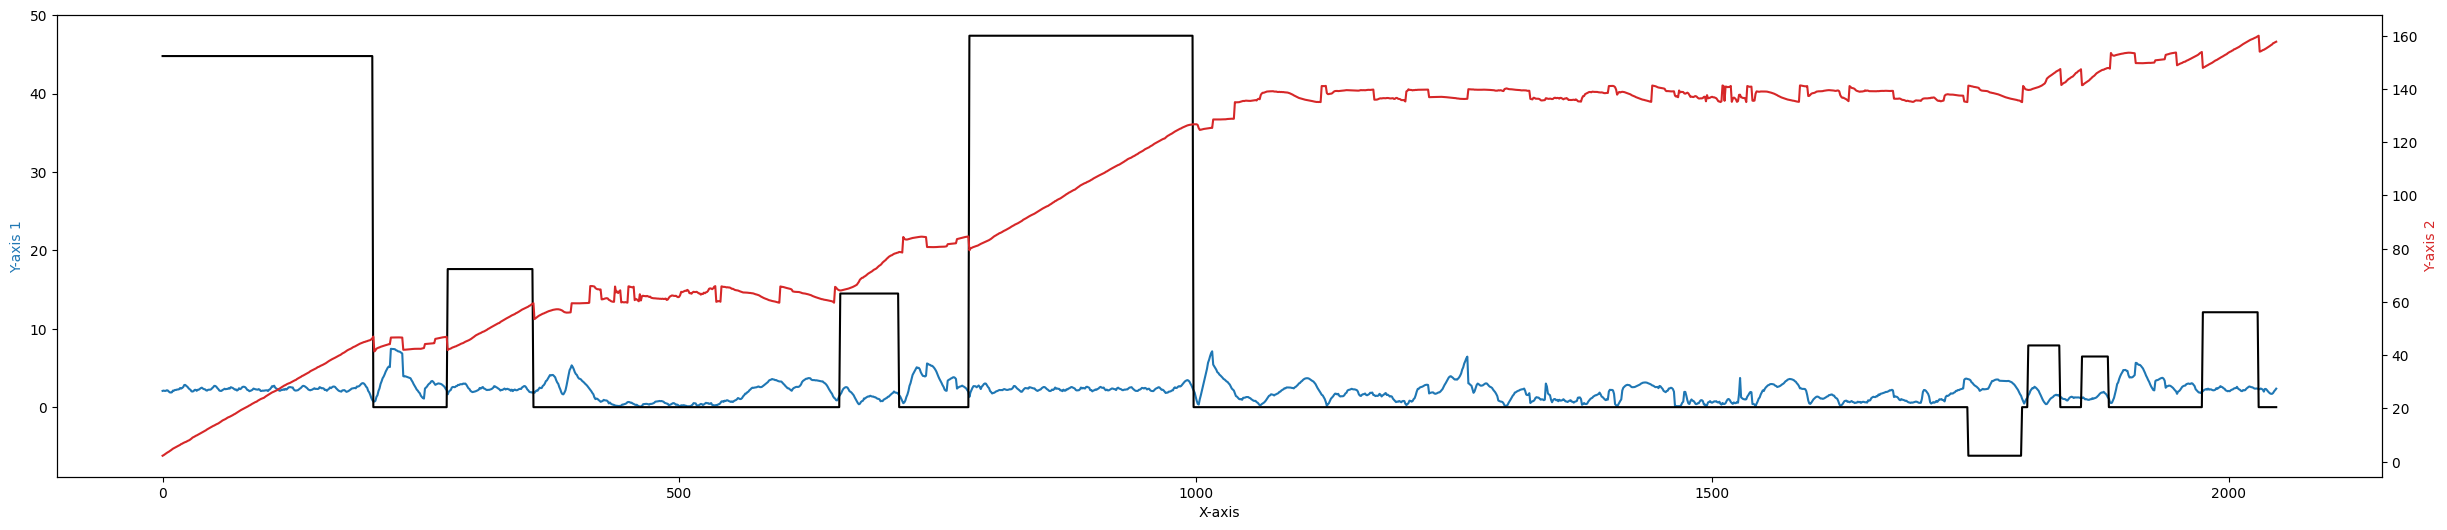

In [ ]:
increasing_subarrays_corrected_theta = find_subarrays(modTheta,1)
decreasing_subarrays_corrected_theta = find_subarrays(modTheta,-1)

timeInd = np.arange(len(modTheta))
cutoffAngle = 5
cutoffLength = 20

statusArr = np.zeros_like(modTheta)
for start,end in increasing_subarrays_corrected_theta:
  diffAngle = modTheta[end] - modTheta[start]
  #print(diffAngle)

  if np.abs(diffAngle) > cutoffAngle and end - start > cutoffLength: #todo pi
    statusArr[start:end] = diffAngle


for start,end in decreasing_subarrays_corrected_theta:
  diffAngle = modTheta[end] - modTheta[start]
  #print(diffAngle)

  if np.abs(diffAngle) > cutoffAngle and end - start > cutoffLength: #todo pi
    statusArr[start:end] = diffAngle

fig, ax1 = plt.subplots(figsize=(30, 6))

ax1.plot(newR, color='tab:blue')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis 1', color='tab:blue')

ax1.plot(statusArr, color='k')


ax2 = ax1.twinx()
ax2.plot(modTheta, color='tab:red')
ax2.set_ylabel('Y-axis 2', color='tab:red')

plt.show()


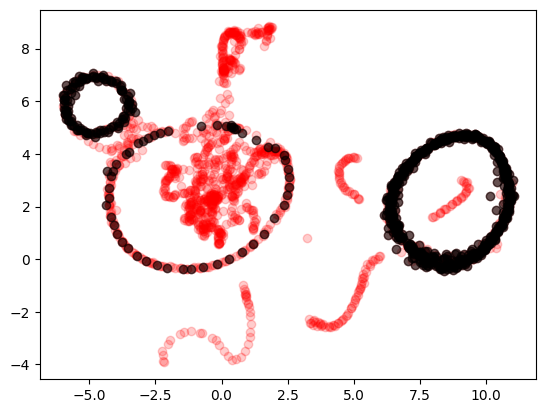

In [ ]:

newI = np.where(statusArr != 0)[0]


plt.scatter(emb[:,0],emb[:,1],alpha = .2,color = 'r')

plt.scatter(emb[newI,0],emb[newI,1],alpha = .6,color = 'k')

plt.show()


In [ ]:
#GPT

def find_continuous_subsequences(arr, value, min_length):
    start = None
    subsequences_indices = []
    current_subsequence = []

    for idx, element in enumerate(arr):
        if element == value:
            if start is None:
                start = idx
            current_subsequence.append(idx)
        else:
            if start is not None:
                end = idx - 1
                if len(current_subsequence) >= min_length:
                    subsequences_indices.extend(current_subsequence)
                current_subsequence = []
                start = None

    if start is not None and len(current_subsequence) >= min_length:
        subsequences_indices.extend(current_subsequence)

    return np.array(subsequences_indices)

# Example array
arr = np.array([0, 1, 1, 1, 2, 3, 1, 1, 1, 1, 0, 1, 1, 1])

# Find continuous sub-sequences of constant value 1 with a minimum length of 3
subsequences_indices = find_continuous_subsequences(arr, value=1, min_length=3)

print("Indices included in sub-sequences longer than or equal to 3:")
print(subsequences_indices)


Indices included in sub-sequences longer than or equal to 3:
[ 1  2  3  6  7  8  9 11 12 13]


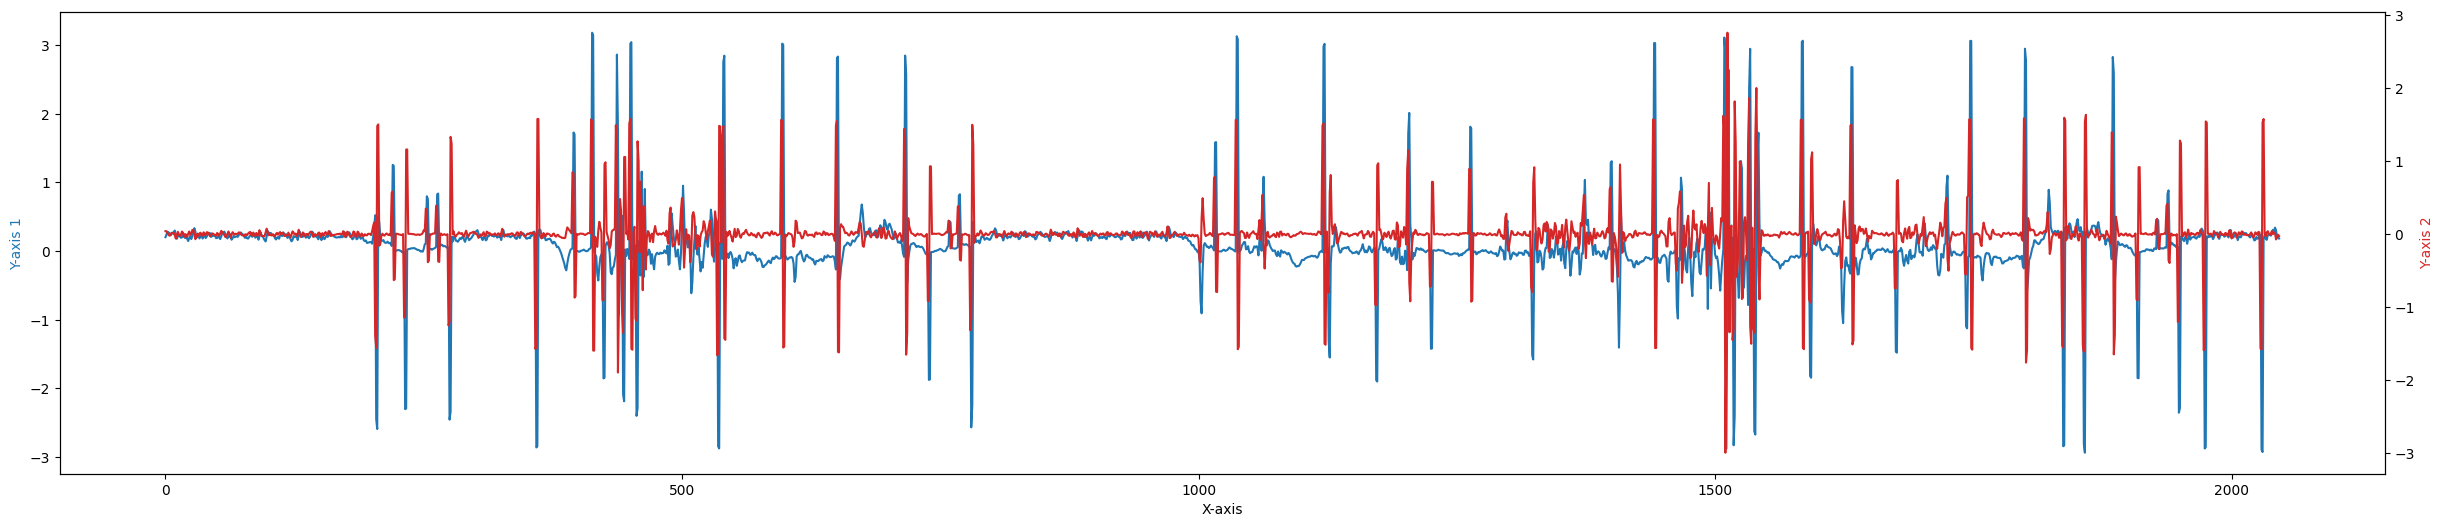

In [ ]:
thetaGrad = np.gradient(modTheta)
thetaSecond = np.gradient(thetaGrad)



fig, ax1 = plt.subplots(figsize=(30, 6))

ax1.plot(thetaGrad, color='tab:blue')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis 1', color='tab:blue')

ax2 = ax1.twinx()
ax2.plot(thetaSecond, color='tab:red')
ax2.set_ylabel('Y-axis 2', color='tab:red')

plt.show()


(2047, 2)
(2047,)


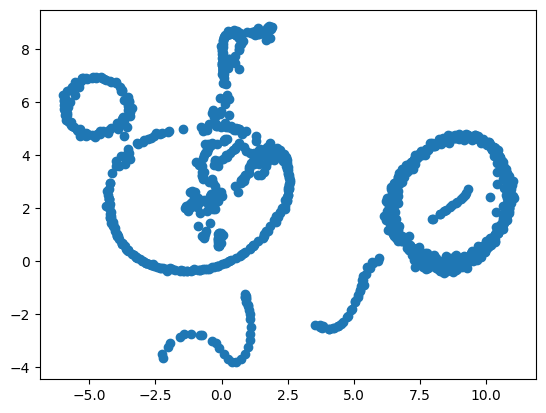

In [ ]:
limitingSignal = np.abs(thetaSecond)
cuttoff = np.median(limitingSignal) *10

print(emb.shape)
print(thetaSecond.shape)
timeIndNew = np.arange(emb.shape[0])
goodInd = np.where(limitingSignal < cuttoff)[0]
# This is our embedding
statusArr = np.zeros_like(thetaSecond)

statusArr[goodInd] = 1


subSeqInd = find_continuous_subsequences(statusArr, 1,20)



# fig, ax1 = plt.subplots(figsize=(30, 6))

# # scipy.ndimage.gaussian_filter1d(statusArr, 1)
# # plt.plot(timeIndNew,statusArr + 1,c = 'r')
# # plt.scatter(timeIndNew,statusArr + 1,c = 'b')

# plt.plot(timeIndNew,limitingSignal,c = 'g',alpha = .5)
# plt.plot(timeIndNew[subSeqInd],limitingSignal[subSeqInd],c = 'r',alpha = .5)

# plt.plot(timeIndNew,limitingSignal*0 + cuttoff,c = 'g',alpha = .5)

# plt.show()


# plt.scatter(emb[:,0],emb[:,1])
# plt.show()


plt.scatter(emb[subSeqInd,0],emb[subSeqInd,1])
plt.show()


# plt.scatter(BCX[subSeqInd],BCY[subSeqInd])
# plt.show()


In [ ]:
def find_subarrays(arr, polarity):
    subarrays = []
    start = 0

    for end in range(1, len(arr)):
        if polarity * arr[end] > polarity * arr[end - 1]:
            continue
        if start < end - 1:
            subarrays.append((start, end - 1))
        start = end

    if start < len(arr) - 1:
        subarrays.append((start, len(arr) - 1))

    return subarrays

# Example array
arr = [1, 2, 3, 2, 1, 5, 3, 2, 1, 0, -1, -2, -1, 0, 1, 2]

# Find increasing sub-arrays
increasing_subarrays = find_subarrays(arr, polarity=1)
print("Increasing sub-arrays:")
print(increasing_subarrays)

# Find decreasing sub-arrays
decreasing_subarrays = find_subarrays(arr, polarity=-1)
print("Decreasing sub-arrays:")
print(decreasing_subarrays)


Increasing sub-arrays:
[(0, 2), (4, 5), (11, 15)]
Decreasing sub-arrays:
[(2, 4), (5, 11)]


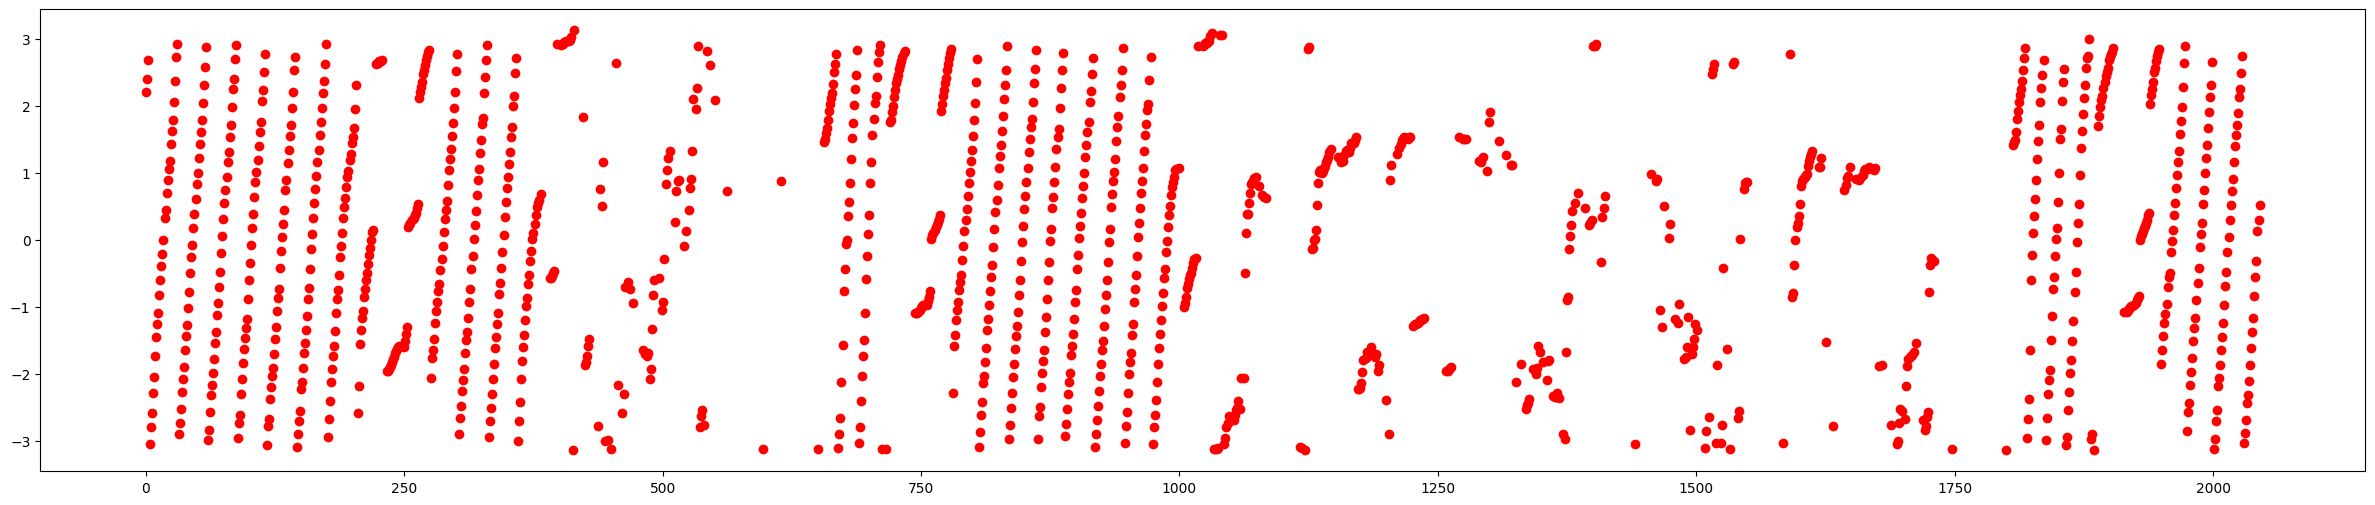

In [ ]:
plt.figure(figsize=(30, 6))

indexOfLoops = find_increasing_subarrays(newTheta)
wholeInd = np.arange(len(newTheta))
for start, end in indexOfLoops:
    plt.scatter(wholeInd[start:end],newTheta[start:end],color = 'r')